In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

FILE='VALUE_FUNC_COPARISON' 
TEST_RESULTS_MAIN_PATH='D:\\PythonProjects\\Alpha_gold\\data\\TEST_RESULTS\\'


path=Path(TEST_RESULTS_MAIN_PATH).joinpath(FILE+ '.json')

with open(path, 'r') as f:
    data = json.load(f)

print(data)
# data['0']=[(-1, 960), (-1, 1260), (-1, 1030), (-1, 3080), (-1, 1570), (-1, 1640), (-1, 2110), (-1, 2800), (-1, 1090), (-1, 3070), (-1, 1040), (-1, 2590), (-1, 2070), (-1, 1110), (1, 8980), (-1, 1070), (-1, 1040), (-1, 1110), (-1, 1530), (-1, 1250), (-1, 1560), (-1, 1470), (-1, 2000), (-1, 1460), (-1, 1400), (-1, 1140), (-1, 1420), (-1, 1400), (-1, 1540), (-1, 1950), (-1, 1320), (-1, 1510), (-1, 1740), (-1, 1350), (-1, 1300), (-1, 1930), (-1, 1080), (-1, 1490), (-1, 550), (-1, 1070), (-1, 1180), (-1, 3140), (-1, 1290), (-1, 1420), (-1, 1190), (-1, 1630), (-1, 1450), (-1, 1140), (-1, 1830), (-1, 880)]


df_list = []

for sim, values in data.items():
    for result, score in values:
        df_list.append({
            'Simulation': sim,
            'Result': result,
            'Score': score
        })

df = pd.DataFrame(df_list)


{'score_time_safty': [[1, 17910], [1, 16010], [1, 16850], [1, 24870], [1, 20130], [1, 19400], [1, 19060], [1, 13010], [1, 18630], [1, 16340], [1, 16970], [1, 13230], [1, 15370], [1, 16310], [1, 22780], [1, 13300], [1, 18950], [1, 16030], [1, 18310], [1, 16410], [1, 15210], [1, 23650], [1, 16130], [1, 22960], [1, 26410], [1, 14640], [1, 18840], [1, 14850], [1, 19560], [1, 16920], [1, 14200], [1, 17240], [1, 19030], [1, 13520], [1, 24420], [1, 16420], [1, 20360], [1, 17950], [1, 11920], [1, 17710], [1, 15980], [1, 15130], [1, 13650], [1, 17090], [1, 16360], [1, 26280], [1, 19100], [1, 17190], [1, 22950], [1, 20760], [1, 15650], [1, 23070], [1, 22660], [1, 21030], [1, 15110], [1, 16950], [1, 15980], [1, 15640], [1, 17770], [1, 19870], [1, 20030], [1, 17410], [1, 24110], [1, 16220], [1, 8730], [1, 24320], [1, 19350], [1, 20890], [1, 20090], [1, 19870], [1, 25690], [1, 24990], [1, 18900], [1, 15790], [1, 23170], [1, 17180], [1, 20780], [1, 15720], [1, 16890], [1, 15800], [1, 15860], [1, 184

In [8]:
df['Simulation'] = df['Simulation'].astype(int)
# df = df[df['Simulation'] % 10 == 1]
# df = df[df['Simulation'].isin([50,75,100])]
df

,Simulation,Result,Score
0,50,1,13130
1,50,1,14650
2,50,1,11680
3,50,1,13780
4,50,1,13730
...,...,...,...
1395,210,1,32380
1396,210,1,30130
1397,210,1,31350
1398,210,1,29310


In [2]:
# # !pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Score'] = scaler.fit_transform(df[['Score']])

In [3]:
summary = df.groupby('Simulation')['Result'].describe()
# summary.index = summary.index.astype(int)
summary_sorted = summary.sort_index()
summary_sorted

,count,mean,std,min,25%,50%,75%,max
Simulation,,,,,,,,
penalty,100.0,1.00,0.000000,1.0,1.0,1.0,1.0,1.0
score,100.0,0.56,0.832666,-1.0,1.0,1.0,1.0,1.0
score_time_safty,100.0,1.00,0.000000,1.0,1.0,1.0,1.0,1.0
score_times_progression,100.0,0.84,0.545320,-1.0,1.0,1.0,1.0,1.0


In [4]:
summary = df.groupby('Simulation')['Score'].describe()
# summary.index = summary.index.astype(int)
summary_sorted = summary.sort_index()
summary_sorted
# Filter out rows where 'Simulation' column values end with 1

,count,mean,std,min,25%,50%,75%,max
Simulation,,,,,,,,
penalty,100.0,0.591490,0.132277,0.248865,0.505011,0.587746,0.668116,1.000000
score,100.0,0.348911,0.151565,0.000000,0.267587,0.377269,0.455276,0.751135
score_time_safty,100.0,0.603952,0.131378,0.241679,0.516736,0.588880,0.671426,0.910363
score_times_progression,100.0,0.412806,0.144587,0.028366,0.328952,0.420197,0.497163,0.815809


In [5]:
df = df

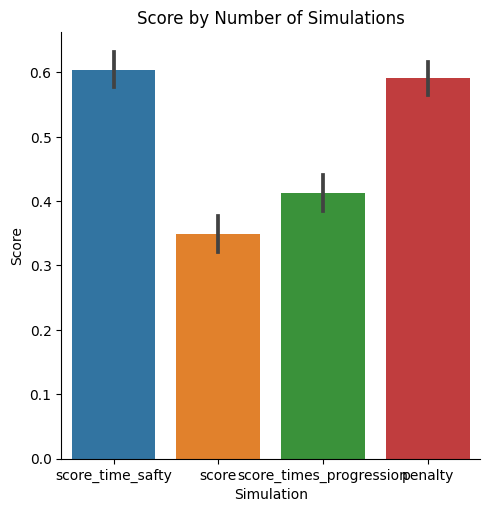

In [6]:
sns.catplot(x='Simulation', y='Score', data=df, kind='bar')
plt.title('Score by Number of Simulations')
plt.show()

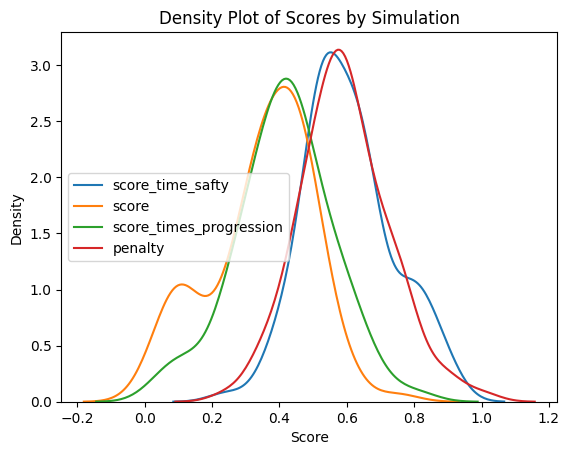

In [7]:
for sim in df['Simulation'].unique():
    sns.kdeplot(df[df['Simulation'] == sim]['Score'], label=sim)

plt.title('Density Plot of Scores by Simulation')
plt.legend()
plt.show()


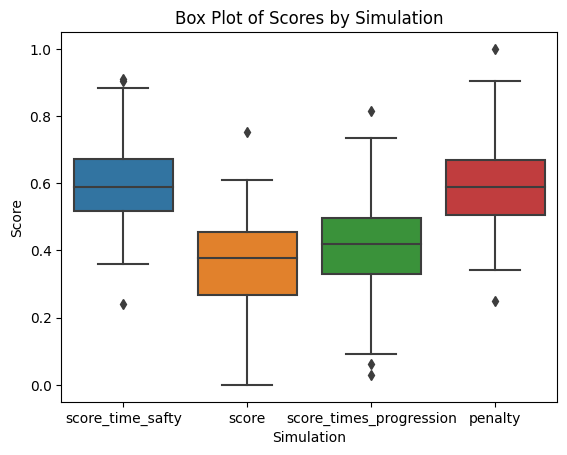

In [8]:
sns.boxplot(x='Simulation', y='Score', data=df)
plt.title('Box Plot of Scores by Simulation')
plt.show()


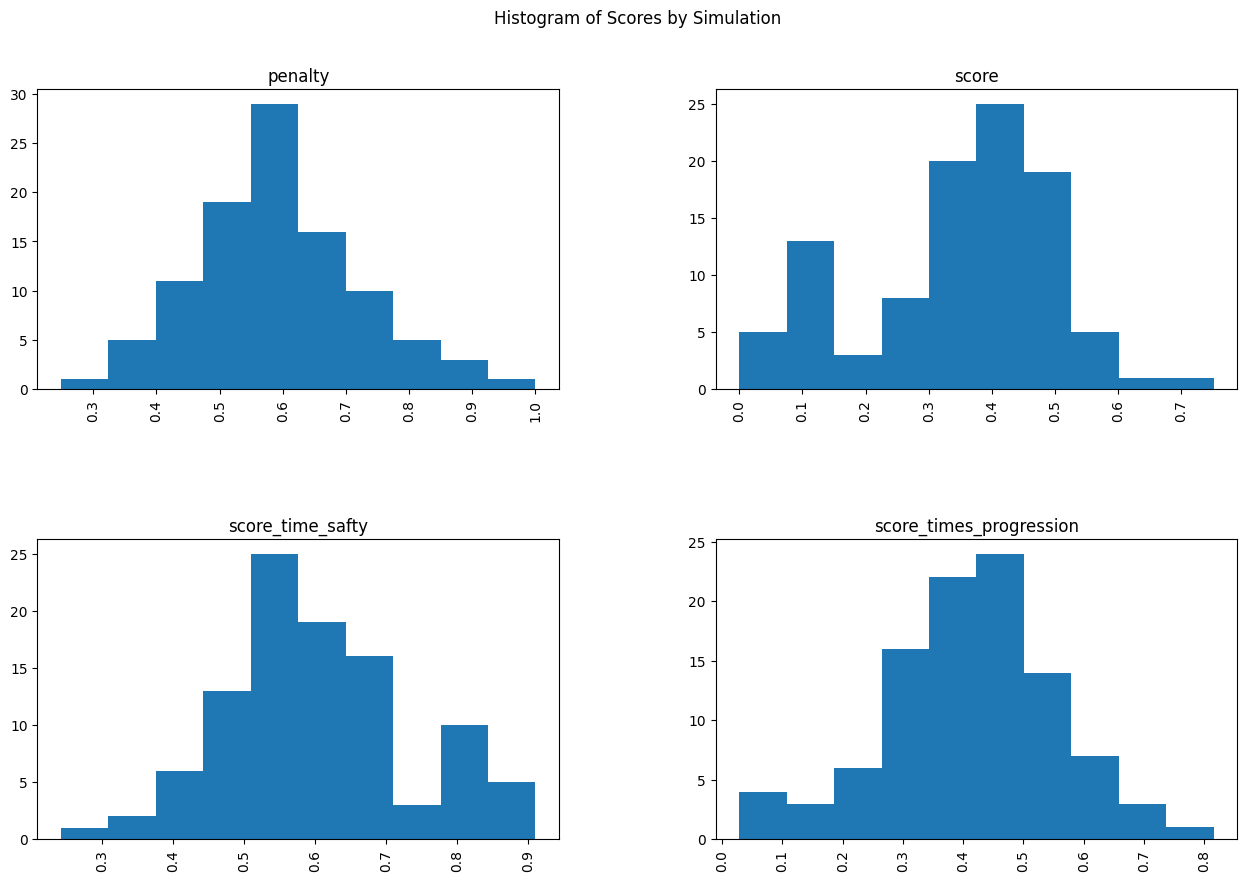

In [9]:

df['Score'].hist(by=df['Simulation'], bins=10, figsize=(15,10))
plt.suptitle('Histogram of Scores by Simulation')
plt.show()


In [ ]:
# correlation_matrix = df.T.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix Heatmap')
# plt.show()


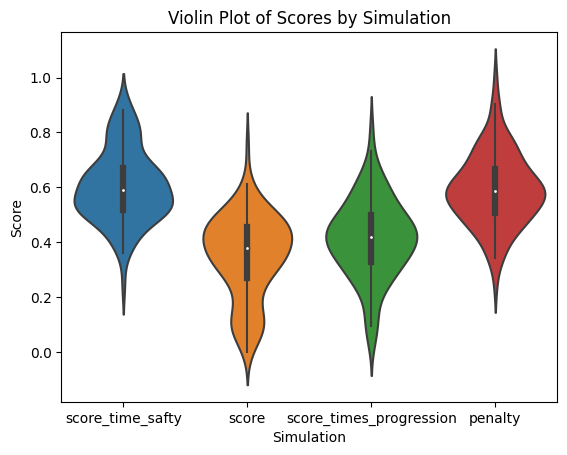

In [10]:
sns.violinplot(x='Simulation', y='Score', data=df)
plt.title('Violin Plot of Scores by Simulation')
plt.show()


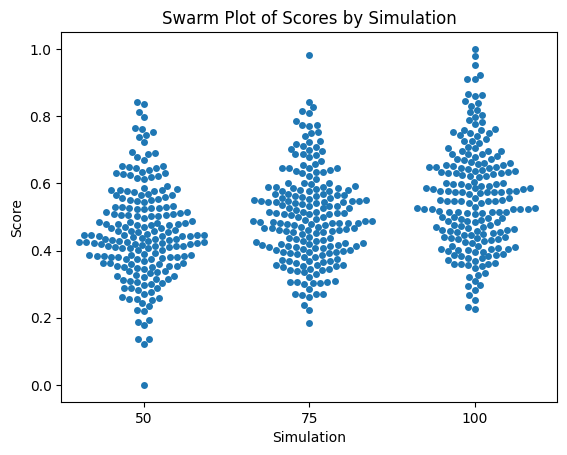

In [35]:
sns.swarmplot(x='Simulation', y='Score', data=df)
plt.title('Swarm Plot of Scores by Simulation')
plt.show()


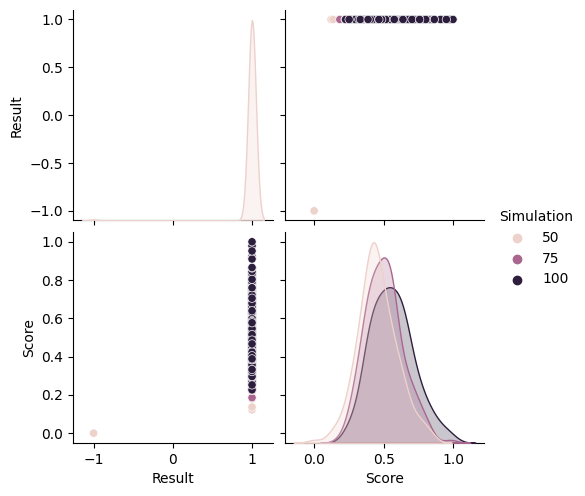

In [36]:
sns.pairplot(df, hue='Simulation')
plt.show()


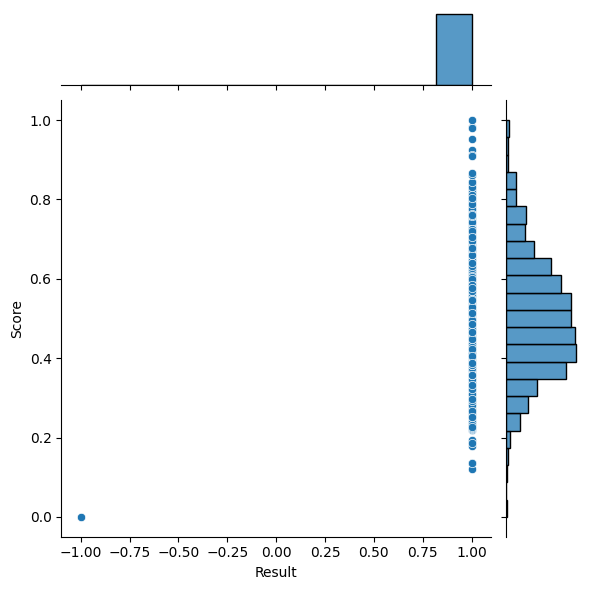

In [37]:
sns.jointplot(x='Result', y='Score', data=df, kind='scatter')
plt.show()
